# Milestone 1 Phase 2

### Name : Alexander Greateine Tanaku
### Class : FTDS - 014

## Objective

Make a deep learning model with artificial neural network to predict customer churn in a company

## Import Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Dataset Loading

In [2]:
# Loading dataset with pandas
pd.set_option('display.max_columns', None) 
df = pd.read_csv('data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Dataset Description
1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female
3. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
4. Partner: Whether they have partner or no 
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
6. Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
7. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
8. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
9. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
10. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
11. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
12. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
13. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
17. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
18. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
19. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
20. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
21. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

In [3]:
# looking every columns excluding customerID
cols = df.select_dtypes(object).columns
cols = cols.drop('customerID')
cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Looking for unique values for all columns
for kolom in cols:
    print(f'Columns {kolom} :',df[kolom].unique())

Columns gender : ['Female' 'Male']
Columns Partner : ['Yes' 'No']
Columns Dependents : ['No' 'Yes']
Columns PhoneService : ['No' 'Yes']
Columns MultipleLines : ['No phone service' 'No' 'Yes']
Columns InternetService : ['DSL' 'Fiber optic' 'No']
Columns OnlineSecurity : ['No' 'Yes' 'No internet service']
Columns OnlineBackup : ['Yes' 'No' 'No internet service']
Columns DeviceProtection : ['No' 'Yes' 'No internet service']
Columns TechSupport : ['No' 'Yes' 'No internet service']
Columns StreamingTV : ['No' 'Yes' 'No internet service']
Columns StreamingMovies : ['No' 'Yes' 'No internet service']
Columns Contract : ['Month-to-month' 'One year' 'Two year']
Columns PaperlessBilling : ['Yes' 'No']
Columns PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Columns TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Columns Churn : ['No' 'Yes']


The data shows that there are some anomalities, Total charges that should be float or integer type of data but it is an object, there will be some data cleaning that needs to be done for this dataset if I want to use this data to make deep learning model. there are also similar category feature, for example in tech support there are no value and no internet service which basically means the same thing

In [5]:
# Replacing missing data with Null Values
df['TotalCharges'].replace(" ", np.NaN, inplace=True)

In [6]:
# Changing Total Charges data to float data
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [7]:
# Making a function to see plot distribution
def plot_dist(df, col, k):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], kde=True,line_kws={'linewidth': 3},color = 'k', bins = k)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

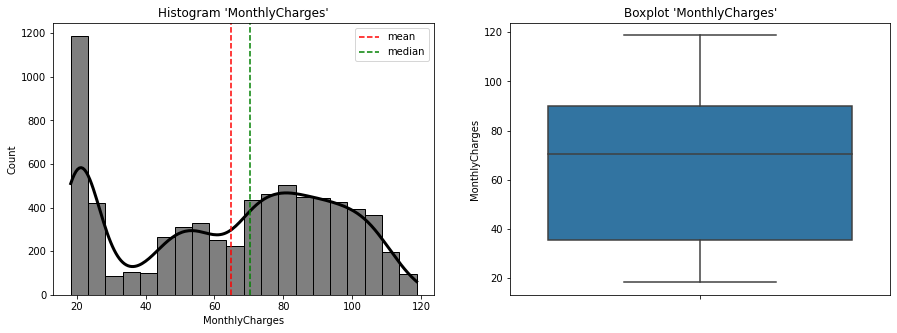

MonthlyCharges Kurtosis: -1.2572596945495056
MonthlyCharges Skewness: -0.22052443394398033
Columns 'MonthlyCharges' normal distribution


In [8]:
plot_dist(df, 'MonthlyCharges', 20)

## Insight

1. Most person have their monthly charges of aroudn 20 dollars
2. However the average person pay around 60 - 80 dollars per month
3. There are significant decrease in person count after the price reach 20 dollars and below 45 dollars, this is a case that looks like an anomalities
4. The highest monthly charges is almost 120 dollars and the number of person who pays that much is almost the same as the people who bay for 40 dollars a month.

In [9]:
# Grouping by senior citizen and churn rates
df.groupby(by = ['SeniorCitizen','Churn']).agg({
    'MonthlyCharges': 'mean',
    'customerID': 'count',
    'tenure': 'mean'
})

MonthlyCharges  customerID     tenure
SeniorCitizen Churn                                       
0             No          58.618123        4508  36.906610
              Yes         72.298098        1393  16.935391
1             No          79.182057         666  42.060060
              Yes         80.713445         476  21.033613

## Insight

1. Older people have higher average monthly charges than younger person
2. We have more young person than senior citizen as a customer
3. the person who churn have higher monthly charges than the person who dont churn
4. Senior citizen are more loyal than those who are not, this can be seen by the higher tenure average

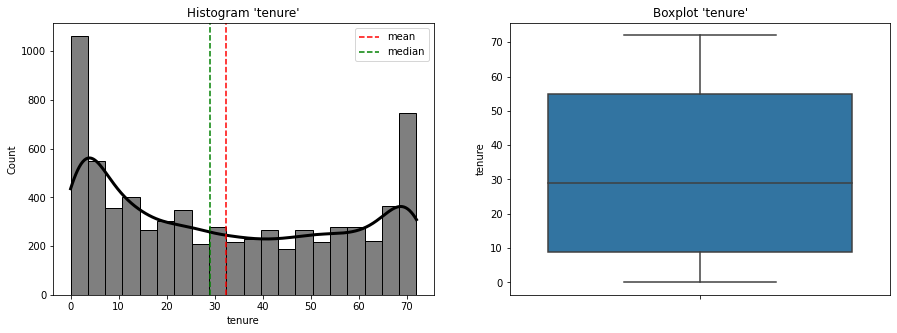

tenure Kurtosis: -1.387371635971685
tenure Skewness: 0.2395397495619829
Columns 'tenure' normal distribution


In [10]:
plot_dist(df, 'tenure', 20)

## Insight
1. Most of our customer have been a customer for more than 2 years
2. We have a good amount of loyal customer seeing that the second highest bar from the graph is the customer that's been with us for 70 months.

In [11]:
# Grouping by the payment method
df.groupby(by = ['PaymentMethod']).agg({
    'MonthlyCharges': 'mean',
    'customerID': 'count',
    'tenure': 'mean'
}).sort_values(by = 'customerID', ascending = False)

,MonthlyCharges,customerID,tenure
PaymentMethod,,,
Electronic check,76.255814,2365,25.174630
Mailed check,43.917060,1612,21.830025
Bank transfer (automatic),67.192649,1544,43.656736
Credit card (automatic),66.512385,1522,43.269382


## Insight
1. Electronic check is the most used payment method
2. People who pay using mailed check have averagely lower monthly charges
3. Customers who are already using our service for a longer period of time pay with Bank transfer or credit card

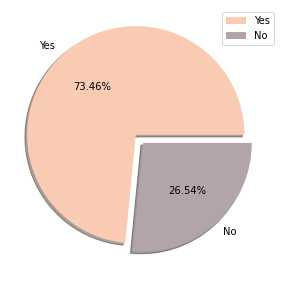

In [12]:
# Making pie chart of churn rates
plt.figure(figsize= (10, 5))
x = round(df["Churn"].value_counts()/df.shape[0]*100,2)
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(x ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#FACBB3', '#B3A4A7'])
plt.legend()
plt.show()

## Insight
Our ratio of customer churn is 26.5%, it is a high percentage of customer churn

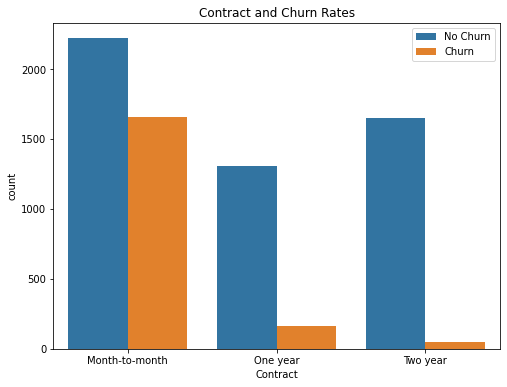

In [13]:
# Making barchart of contract types and churn rates
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Contract", hue="Churn", data=df).set(title='Contract and Churn Rates')
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

## Insight
Most of our customer who churn is the one with month to month contract, the higher the contract period, the lower the churn rate

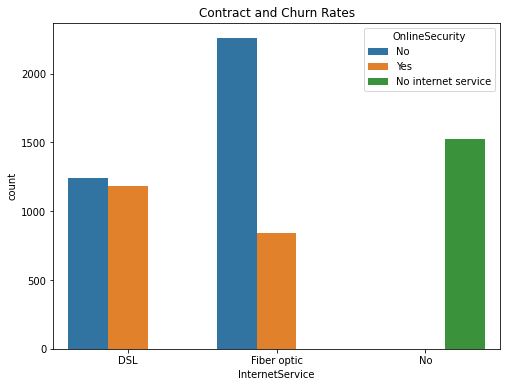

In [14]:
# Making Countplot of internet service and online security
plt.figure(figsize=(8,6))
ax = sns.countplot(x="InternetService", hue="OnlineSecurity", data=df).set(title='Contract and Churn Rates')
plt.show()

## Insight
1. More people are using Fiber optic than the other type of internet services
2. there are still a lot of customer that doesn't subscribe to our online security services although they are using internet, this can be dangerous because their privacy and data is in danger
3. 1500 customer still not using our internet service

<AxesSubplot:>

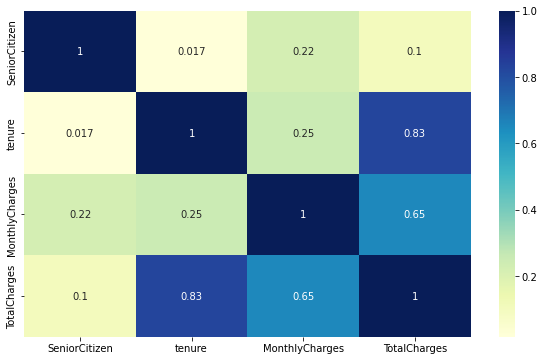

In [15]:
# Making Heatmap correlation with seaborn
fig, ax = plt.subplots(figsize=(10,6))
# Making the heatmap 
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax = ax)

Looking at the Correlation between numerical feature, there are high correlation between monthly charges and total charge, this is easily understandable since when people pay more each month, their total payment will be high. The interesting part is high correlation between tenure and monthly charges, it means that the longer they use our service, the more expensive the monthly charge. There is also high correlation between senior citizen and total charges and monthly charge, this is aligned with our EDA that senior citizen pays more than younger customer in our company.

# Deep Learning Work Area

In [16]:
data_train_test = df.drop('customerID', axis = 1)

I drop the customer ID because I believe customer ID doesn't have any correlation with customer churning or not because customerID is generated randomly.

In [17]:
# data_train_test.replace('No internet service','No',inplace=True)
# data_train_test.replace('No phone service','No',inplace=True)

I change the no internet service and no phone service as no because it is the same

## Inferencing

In [18]:
data_inf = data_train_test.sample(10, random_state = 17)
data_train_test = data_train_test.drop(data_inf.index)

In [19]:
data_train_test.reset_index(inplace = True, drop = True)
data_inf.reset_index(drop = True, inplace = True)

## Data Preparation - Splitting Train and Test

In [20]:
X = data_train_test.drop('Churn', axis = 1)
y = data_train_test['Churn']

In [21]:
#Memisahkan data menjadi train, val, test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9,random_state = 17)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.85,random_state = 17)

In [22]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

In [23]:
print('X_train shape', X_train.shape)
print('X_value shape', X_val.shape)
print('X_test shape', X_test.shape)

X_train shape (5379, 19)
X_value shape (950, 19)
X_test shape (704, 19)


In [24]:
print('Train Feature Missing Value')
print(X_train.isnull().sum())
print('---'*10)
print('Test Feature Missing Value')
print(X_test.isnull().sum())
print('---'*10)
print('Validation Feature Missing Value')
print(X_val.isnull().sum())

Train Feature Missing Value
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64
------------------------------
Test Feature Missing Value
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64
------------------------------
Validation Feature Mi

In [25]:
print('Train Missing Value : ', y_train.isnull().sum())
print('Test Missing Value : ', y_test.isnull().sum())
print('Validation Missing Value : ', y_val.isnull().sum())

Train Missing Value :  Churn    0
dtype: int64
Test Missing Value :  Churn    0
dtype: int64
Validation Missing Value :  Churn    0
dtype: int64


## Data Preparation - Checking Missing Values

In [26]:
X[X['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
3328,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
3820,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
4373,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
5211,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
6661,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN


We can see that there are a pattern in the missing values in our feature, the tenure of all the missing value is 0 meaning that they are not even being a year in being our customer, and since the missing data is less than 1% of our overall data, I decide to remove the null data.

In [27]:
# Function to remove data in feature and target
def removenull(df,col,y):
    a = df[df[col].isnull()].index.tolist()
    y = y.drop(a, inplace = True)
    df = df.drop(a, inplace = True)

In [28]:
# Removing null valuse in feature and target
removenull(X_train,'TotalCharges',y_train)
removenull(X_test, 'TotalCharges', y_test)

## Splitting Numerical and Categorical Data

In [29]:
# Numerical column name
num_columns =['tenure','MonthlyCharges','TotalCharges']

# Make Feature to do scaling
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

In [30]:
# splitting categorical columns to be encoded 
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()
## adding Encoded Senior Citizen Name in the column
cat_columns.append('SeniorCitizen')

In [31]:
## Features consisting of categorical columns
X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

## Outlier Handling

<AxesSubplot:>

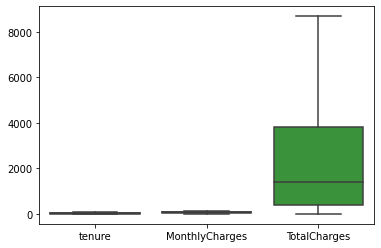

In [32]:
# Making boxplot for all feature
sns.boxplot(data = X_train_num)

No outliers detected by looking at the boxplot so there is no outlier handling that needs to be done

## Feature Scaling

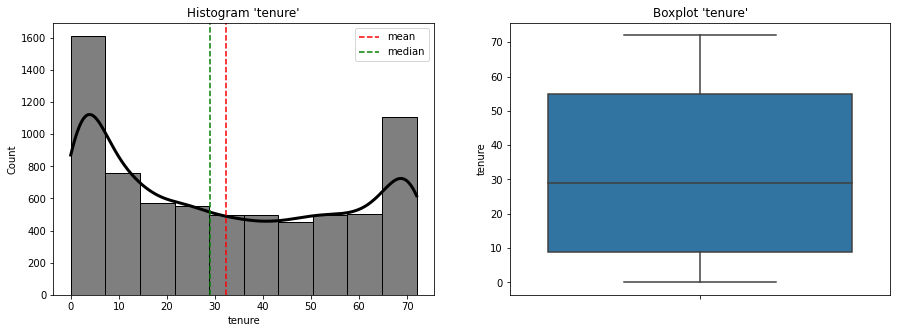

tenure Kurtosis: -1.387371635971685
tenure Skewness: 0.2395397495619829
Columns 'tenure' normal distribution


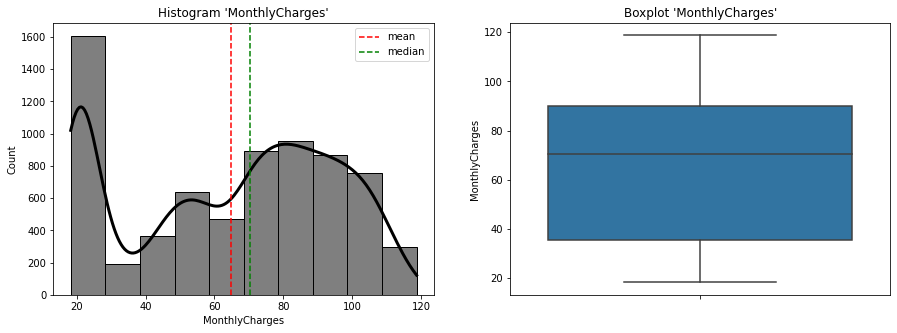

MonthlyCharges Kurtosis: -1.2572596945495056
MonthlyCharges Skewness: -0.22052443394398033
Columns 'MonthlyCharges' normal distribution


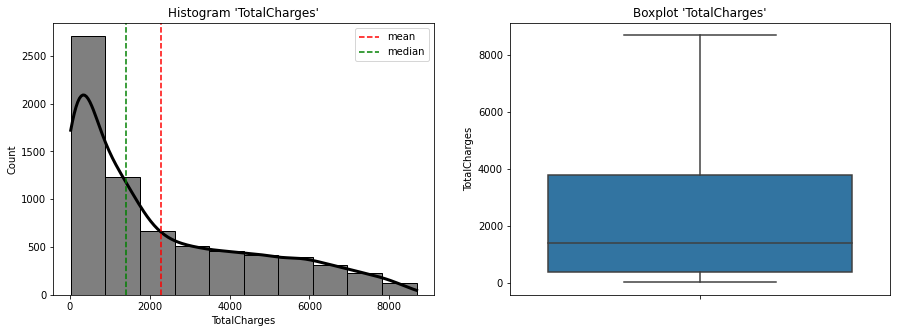

TotalCharges Kurtosis: -0.231798760869379
TotalCharges Skewness: 0.961642499724251
Columns 'TotalCharges' right skewed


In [33]:
# Plotting the Distribution of each Numerical Columns
for feat in num_columns: 
    plot_dist(df, feat, 10)

Since the data is not too extremely skewed left or right, I can still consider the overall data as normal distribution, hence I will use Standard Scaler for the numerical data

## Feature Engineering - Encoding

In [34]:
# Categorical for one hot encoding
cat_ohe = ['PaymentMethod', 'Contract', 'InternetService','gender']
# Categorical for Ordinal Encoder
cat_le = X_train.drop(cat_ohe, axis = 1).select_dtypes(include = ['object']).columns.tolist()

Some of the categorical value like payment method, contract internet service and gender should be encoded differently than other categories, this is because those categorical doesn't have any meaningful order so I decide to OneHotEncode this

I also encode all of the target because it is still in string datatype

In [35]:
# Encoding the Target 
encoder_target = OrdinalEncoder()
y_train = encoder_target.fit_transform(y_train)
y_test = encoder_target.transform(y_test)
y_val = encoder_target.transform(y_val)

In [36]:
y_train

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [37]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
y_val = pd.DataFrame(y_val)

## Feature Selection - Categorical Data

In [38]:
## Feature Encoding all column for feature selection

encoder = OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [68]:
# Feature selection best 4 chi score
select_feature = SelectKBest(chi2, k = 4).fit(X_train_cat_encoded, y_train)

selected_features = pd.DataFrame({
    'features': cat_columns,
    'scores': select_feature.scores_, 
})

selected_features.sort_values(by = 'scores', ascending = False)
# Jika pakai P_values maka melihat signifikansi dari feature pakai (pvalues_)
#chi2 score melihat feature importance dan signifikansi secara bersamaan pakai (scores_)

,features,scores
12,Contract,860.186214
6,OnlineSecurity,432.798689
9,TechSupport,381.850274
7,OnlineBackup,174.312440
8,DeviceProtection,140.388070
2,Dependents,114.642460
15,SeniorCitizen,106.494038
1,Partner,77.926589
13,PaperlessBilling,74.722785
14,PaymentMethod,50.937064


From the chi square score, we can see which feature are more important than the other, feature of contract has the most significance with the target. Later on in Feature engineering with pipeline, I will only choose the best feature with high chi square.

## Feature Engineering with Pipeline

In [43]:
# Numerical Pipeline 
num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),  # Imputing any missing values
    StandardScaler(), # Scaling with Standard Scaler
)

# Categorical Pipeline One Hot Encoder
cat_pipeline_ohe = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'), # impute with the most frequent values
    OneHotEncoder(), # One hot Encoder
    SelectKBest(chi2, k = 8) # 8 is from 4 column for contract, 2 for payment, 2 for internet service with highest chi2 score
)

# Categorical pipeline Ordinal Encoder
cat_pipeline_le = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),# imput with most frequent values
    OrdinalEncoder(),
    SelectKBest(chi2, k = 5)
)

# Pipeline for oversampling
over_pipeline  = imbpipeline(steps = [['smote', SMOTE(random_state=11)]])


# Overall pipeline
data_pipeline = ColumnTransformer([
    ('pipeline_num', num_pipeline, num_columns),
    ('pipeline_cat_le', cat_pipeline_le, cat_le),
    ('pipeline_cat_ohe', cat_pipeline_ohe, cat_ohe)
])

# Final_pipeline for pre processing data

final_pipeline = make_pipeline(data_pipeline)

## Pipeline Explanation

1. Make Pipeline for numerical data that is going to be scaled
2. Make Categorical Pipeline that is going to be one hot encoded
3. Make categorical pipeline that is going to be label encoded
4. Combine all pipeline 

In [44]:
# Fitting the train test and validation into 
X_train_processed = final_pipeline.fit_transform(X_train, y_train)
X_test_processed = final_pipeline.transform(X_test)
X_val_processed = final_pipeline.transform(X_val)

In [45]:
# X_train_processed, y_train = pipeline.fit_resample(X_train_processed, y_train)
# X_train_processed.shape

## TensorFlow Input Pipeline

In [46]:
# Make tensorflow input Pipeline for faster processing
tf_train = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train))
train_dataset = tf_train.shuffle(buffer_size=128).batch(64)

tf_test = tf.data.Dataset.from_tensor_slices((X_test_processed, y_test))
test_dataset = tf_test.shuffle(buffer_size=128).batch(64)

tf_val = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val))
val_dataset = tf_val.batch(64)

In [47]:
AUTOTUNE = tf.data.AUTOTUNE
tf_train = tf_train.cache().prefetch(buffer_size=AUTOTUNE)

This input pipeline is made to optimize the computer for faster computing and less time spent to process the data. Tensorflow input pipeline enable parallel computing, while the GPU is training, the CPU is prefetching the next batch for training. I choose 64 data per batch and shuffle the data each epoch. The number of data pre fetched by the computer is autotune by tensorflow.

## Tensorflow Sequential ANN Model

In [49]:
model = Sequential()
model.add(Dense(10, input_shape=(16,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

sgd = SGD(learning_rate=0.5)

model.compile(
    optimizer = sgd,
    loss='binary_crossentropy',
   metrics=[tf.keras.metrics.AUC()]
)

history = model.fit(
    train_dataset, 
    epochs=50, 
    validation_data = val_dataset,
    callbacks=[early_stopping])

Epoch 1/50
84/84 [==============================] - 2s 6ms/step - loss: 0.4565 - auc_1: 0.8079 - val_loss: 0.4221 - val_auc_1: 0.8417
Epoch 2/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4307 - auc_1: 0.8342 - val_loss: 0.4196 - val_auc_1: 0.8431
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4273 - auc_1: 0.8369 - val_loss: 0.4151 - val_auc_1: 0.8469
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4236 - auc_1: 0.8404 - val_loss: 0.4150 - val_auc_1: 0.8461
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4249 - auc_1: 0.8389 - val_loss: 0.4137 - val_auc_1: 0.8488
Epoch 6/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4205 - auc_1: 0.8429 - val_loss: 0.4119 - val_auc_1: 0.8499
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4215 - auc_1: 0.8420 - val_loss: 0.4102 - val_auc_1: 0.8495
Epoch 8/50
84/84 [==============================] - 0s 3ms/ste

I am making a model with a sequential architecture. I use early stopping for my model, hoping that if there is no improvement for several epoch, the training could be stopped to save my computing power. the activation function that I choose is Relu, so it can ignore any weight below zero. I also compile my model with Stochastic Gradient Descent because SGD have the best result in my opinion although it runs slowly, it is okay because my dataset is relatively small. I also didn't put any hidden layers in this model because I want to keep it simple

In [50]:
result = model.evaluate(test_dataset)

11/11 [==============================] - 0s 4ms/step - loss: 0.4472 - auc_1: 0.8210


the result after I put test data is 0.8171 and  the score is in auc not accuracy, I choose auc because I think that auc metrics is better for imbalance dataset such as this one

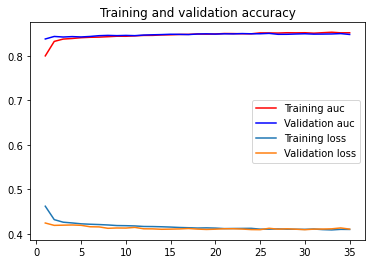

In [47]:
# Visualize accuracy and loss for train and validation data

acc = history.history['auc']
val_acc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training auc')
plt.plot(epochs, val_acc, 'blue', label='Validation auc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()

The result of first training is quite good, the auc accuracy is 0.8165 which means this model can predict correctly with 81.65% accuracy. AUC scores are used instead of Accuracy because it can determine the result better for imbalanced target dataset like this one. This model is a good fit because the line is almost overlapping with each other.

## TensorFlow Sequential Tuned

In [75]:
model_tuned = Sequential()
model_tuned.add(Dense(20, input_shape=(17,), activation='elu', kernel_constraint=MaxNorm(3)))
model_tuned.add(Dropout(0.3))
model_tuned.add(Dense(14, activation="elu", kernel_constraint=MaxNorm(3)))
model_tuned.add(Dropout(0.5))
model_tuned.add(Dense(1, activation='sigmoid'))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

sgd = SGD(learning_rate=0.07)

model_tuned.compile(
    optimizer = sgd,
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

history = model_tuned.fit(
    train_dataset, 
    epochs=50, 
    validation_data = val_dataset,
    callbacks=[early_stopping])

Epoch 1/50
84/84 [==============================] - 1s 5ms/step - loss: 0.5336 - auc_9: 0.7257 - val_loss: 0.4341 - val_auc_9: 0.8275
Epoch 2/50
84/84 [==============================] - 0s 4ms/step - loss: 0.4737 - auc_9: 0.7903 - val_loss: 0.4280 - val_auc_9: 0.8334
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4687 - auc_9: 0.7940 - val_loss: 0.4260 - val_auc_9: 0.8362
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4607 - auc_9: 0.8060 - val_loss: 0.4240 - val_auc_9: 0.8377
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4556 - auc_9: 0.8114 - val_loss: 0.4230 - val_auc_9: 0.8385
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4498 - auc_9: 0.8152 - val_loss: 0.4219 - val_auc_9: 0.8394
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4496 - auc_9: 0.8155 - val_loss: 0.4209 - val_auc_9: 0.8405
Epoch 8/50
84/84 [==============================] - 0s 3ms/ste

The tuning that I have done is putting dropout for 30% and lower the learning rate for stochastic gradient descent so the machine can find the optimum gradient descent. Dropout meaning I am turning off some of the random neuron from the hidden layer or maybe the input layer. Kernel constraint max norm(3) is a regularization method to penalize high weight with my loss function. I also add 1 dense layers with 14 neurons. the activation function is still relu because I believe this is a linear problem and the output activation function is sigmoid since the output can only predict 2 class not multiclass. the loss function is binary crossentropy because it is a good loss function for binary classification such as this one

In [76]:
result = model_tuned.evaluate(test_dataset)

11/11 [==============================] - 0s 3ms/step - loss: 0.4491 - auc_9: 0.8172


The result is almost the same as the one before tuning, I even tried a different activation function but the result is the same.

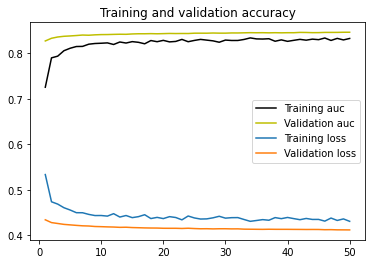

In [77]:
# Visualize accuracy and loss for train and validation data

acc = history.history['auc_9']
val_acc = history.history['val_auc_9']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'k', label='Training auc')
plt.plot(epochs, val_acc, 'y', label='Validation auc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()

Although at first the validation have higher auc than training, over the time it is getting closer and closer, I think this graph is a good fit but not a perfect fi since the training does worst than the validation.

## Oversampling

In [51]:
X_train_processed = final_pipeline.fit_transform(X_train, y_train)
X_val_processed = final_pipeline.transform(X_val)

X_train_oversample, y_train_oversample = over_pipeline.fit_resample(X_train_processed, y_train)
X_val_oversample,y_val_oversample = over_pipeline.fit_resample(X_val_processed, y_val)

In [52]:
tf_train = tf.data.Dataset.from_tensor_slices((X_train_oversample, y_train_oversample))
tf_val = tf.data.Dataset.from_tensor_slices((X_val_oversample, y_val_oversample))
train_dataset_over = tf_train.shuffle(buffer_size=128).batch(64)
val_dataset_over = tf_val.shuffle(buffer_size=128).batch(64)

In [53]:
model_over = Sequential()
model_over.add(Dense(10, input_shape=(17,), activation='relu', kernel_constraint=MaxNorm(3)))
model_over.add(Dropout(0.3))
model_over.add(Dense(1, activation='sigmoid'))

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

sgd = SGD(learning_rate=0.07)

model_over.compile(
    optimizer = sgd,
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

history = model_over.fit(
    train_dataset_over, 
    epochs=50, 
    validation_data = val_dataset_over,
    callbacks=[early_stopping])

Epoch 1/50
123/123 [==============================] - 1s 4ms/step - loss: 0.5468 - auc_2: 0.8218 - val_loss: 0.8167 - val_auc_2: 0.7609
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 0.5057 - auc_2: 0.8300 - val_loss: 0.7847 - val_auc_2: 0.8289
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 0.4939 - auc_2: 0.8398 - val_loss: 0.7259 - val_auc_2: 0.8471
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 0.4890 - auc_2: 0.8443 - val_loss: 0.7039 - val_auc_2: 0.8523
Epoch 5/50
123/123 [==============================] - 0s 3ms/step - loss: 0.4857 - auc_2: 0.8475 - val_loss: 0.6827 - val_auc_2: 0.8543
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 0.4808 - auc_2: 0.8514 - val_loss: 0.6700 - val_auc_2: 0.8558
Epoch 7/50
123/123 [==============================] - 0s 3ms/step - loss: 0.4761 - auc_2: 0.8539 - val_loss: 0.6540 - val_auc_2: 0.8565
Epoch 8/50
123/123 [============================

In [54]:
result = model_over.evaluate(test_dataset)

11/11 [==============================] - 0s 2ms/step - loss: 0.8776 - auc_2: 0.8104


There is not much of a difference even after doing resampling and tuning for the Sequential ANN learning, however the training data can give higher auc score but also higher val loss.

## Functional Model

In [55]:
from tensorflow.keras.layers import Dense, Input
layer1 = Input(shape = (17,)) #Input layer
layer2 = Dense(24, activation = 'relu')(layer1) #Hidden Layer
layer3 = Dense(12, activation = 'relu')(layer2) # Hidden Layer
output = Dense(1, activation = 'sigmoid')(layer3) #Output layer


## All of the same optimiser, loss function and metrics for functional model 
func_model = Model(inputs = layer1, outputs = output)

func_model.compile(loss="binary_crossentropy", 
                   optimizer=keras.optimizers.SGD(learning_rate=0.2),
                   metrics=[tf.keras.metrics.AUC()])


func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_7 (Dense)             (None, 24)                432       
                                                                 
 dense_8 (Dense)             (None, 12)                300       
                                                                 
 dense_9 (Dense)             (None, 1)                 13        
                                                                 
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


In [56]:
func_history = func_model.fit(
    train_dataset, 
    epochs=50, 
    validation_data = val_dataset,
    callbacks=[early_stopping])

Epoch 1/50
84/84 [==============================] - 1s 4ms/step - loss: 0.4478 - auc_3: 0.8176 - val_loss: 0.4201 - val_auc_3: 0.8405
Epoch 2/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4289 - auc_3: 0.8359 - val_loss: 0.4198 - val_auc_3: 0.8426
Epoch 3/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4245 - auc_3: 0.8393 - val_loss: 0.4145 - val_auc_3: 0.8440
Epoch 4/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4240 - auc_3: 0.8397 - val_loss: 0.4163 - val_auc_3: 0.8434
Epoch 5/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4201 - auc_3: 0.8433 - val_loss: 0.4145 - val_auc_3: 0.8441
Epoch 6/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4201 - auc_3: 0.8429 - val_loss: 0.4140 - val_auc_3: 0.8449
Epoch 7/50
84/84 [==============================] - 0s 3ms/step - loss: 0.4178 - auc_3: 0.8452 - val_loss: 0.4138 - val_auc_3: 0.8448
Epoch 8/50
84/84 [==============================] - 0s 3ms/ste

In [57]:
result = func_model.evaluate(test_dataset)

11/11 [==============================] - 0s 2ms/step - loss: 0.4487 - auc_3: 0.8170


The result of functional model is almost the same as the sequential model, the functional and sequential model that I make here is the same model but different architecture.

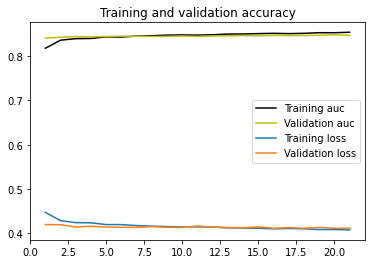

In [58]:
# Visualize accuracy and loss for train and validation data

acc = func_history.history['auc_3']
val_acc = func_history.history['val_auc_3']
loss = func_history.history['loss']
val_loss = func_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'k', label='Training auc')
plt.plot(epochs, val_acc, 'y', label='Validation auc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()

The result for our functional model is similar with the sequential model, this is because the problem of this data is not too complex so it doesn't need any complex model to learn this dataset.

## Functional Model Tuning

In [47]:
from tensorflow.keras.layers import Dense, Input
layer1 = Input(shape = (17,)) #Input layer
layer2 = Dense(24, activation = 'elu')(layer1) #Hidden Layer with elu activation function
layer3 = Dropout(0.5)(layer2) #Dropout layer to drop 50% of unused neuron
layer4 = Dense(12, activation = 'elu')(layer3) # Hidden Layer to simplify to 12 neuron and elu activation function
concat = keras.layers.concatenate([layer1, layer4]) # Concatenating input layer with layer 3 
output = Dense(1, activation = 'sigmoid')(concat) #Output layer


## All of the same optimiser, loss function and metrics for functional model 
func_model = Model(inputs = layer1, outputs = output)

func_model.compile(loss="binary_crossentropy", 
                   optimizer=keras.optimizers.SGD(learning_rate=0.05),
                   metrics=[tf.keras.metrics.AUC()])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

func_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 24)           432         ['input_2[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 24)           0           ['dense_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 12)           300         ['dropout_1[0][0]']              
                                                                                            

Here I add Dropout in functional model just as in Sequential Model and I make it a little bit complicated by concatting the result of layer 4 with input layer before it goes into the output layer. I also lower the learning rate so the sgd can go 'descent' slowly to find the best weight. because sgd takes a long time, I also input higher number for epoch so the machine can learn slowly and keep improving. However, I will still put early stopping.

In [48]:
func_history2 = func_model.fit(
    train_dataset, 
    epochs=100, 
    validation_data = val_dataset,
    callbacks=[early_stopping])

Epoch 1/100
84/84 [==============================] - 3s 5ms/step - loss: 0.5206 - auc_1: 0.7353 - val_loss: 0.4412 - val_auc_1: 0.8236
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4557 - auc_1: 0.8077 - val_loss: 0.4324 - val_auc_1: 0.8291
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4445 - auc_1: 0.8201 - val_loss: 0.4281 - val_auc_1: 0.8323
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4393 - auc_1: 0.8248 - val_loss: 0.4266 - val_auc_1: 0.8337
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4368 - auc_1: 0.8273 - val_loss: 0.4250 - val_auc_1: 0.8353
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4340 - auc_1: 0.8303 - val_loss: 0.4234 - val_auc_1: 0.8366
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4350 - auc_1: 0.8296 - val_loss: 0.4224 - val_auc_1: 0.8374
Epoch 8/100
84/84 [==============================] - 0s

In [61]:
result = func_model.evaluate(test_dataset)

11/11 [==============================] - 0s 2ms/step - loss: 0.4496 - auc_4: 0.8169


The result is almost the same after tuning

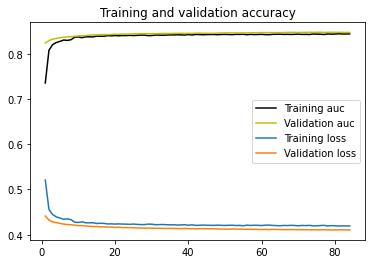

In [49]:
acc = func_history2.history['auc_1']
val_acc = func_history2.history['val_auc_1']
loss = func_history2.history['loss']
val_loss = func_history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'k', label='Training auc')
plt.plot(epochs, val_acc, 'y', label='Validation auc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()

This Functional model after tuning is unique because the initial accuracy is already good and it almost overlap with the validation dataset. This model is a good fit by looking at the graph.

## Inferencing

The Model with the best result is tuned model, let's try to use the model for data after inference

In [64]:
# Splitting feature and target
X_inf = data_inf.drop('Churn', axis = 1)
y_inf = pd.DataFrame(data_inf.Churn)

In [65]:
# Applying preprocessing pipeline
X_inf_processed = final_pipeline.transform(X_inf)
y_inf_encoded = encoder_target.transform(y_inf)

In [83]:
res_inf = model_tuned.evaluate(X_inf_processed,y_inf_encoded)

1/1 [==============================] - 0s 19ms/step - loss: 0.2510 - auc_9: 1.0000


Wow, our model have a very high auc score and low loss. 

## Conclusion

1. The type of contract is the one heavily influencing churn rate with chi square test
2. The best ANN model is the sequential ANN model after tuning, however the difference between each other is not too distinct, hence it cannot be said that the model is the best after all.
3. Lowering SGD learning rate may take more time than high learning rate, but tend to give better result and lower loss
4. To make more complex model, functional type of model is better